In [38]:
# Importing Libraries
import pandas as pd
import numpy as np

# For all NLP related operations on text
import re   # Regular expression
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignoring all the warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [40]:
# Read dataset
tweet = pd.read_csv('Elon_musk.csv', encoding='latin1')

In [41]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [42]:
tweet = tweet.drop('Unnamed: 0', axis = 1)

In [43]:
tweet = tweet.rename(columns= {'Text': 'Tweet'}, inplace= False)
tweet.head()

,Tweet
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [44]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1698 non-null   object
dtypes: object(1)
memory usage: 13.4+ KB


In [45]:
tweet.describe()

,Tweet
count,1698
unique,1696
top,@westcoastbill Indeed
freq,2


In [48]:
tweet.isnull().sum()

Tweet    0
dtype: int64

**Removing Punctuations, Numbers and Special characters**

This step should not be followed if we also want to do sentiment analysis on **key phrases** as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on **key words**.

In [49]:
# Cleaning the text by removing irrelevant information
import re # Regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

# Clean The Text
tweet["Tweet"] = tweet["Tweet"].apply(clean_text)
tweet.head()

,Tweet
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [50]:
# Word frequency
freq = pd.Series(' '.join(tweet['Tweet']).split()).value_counts()[:20] # for top 20
freq

the               425
to                349
a                 316
is                304
of                276
spacex            221
amp               193
in                185
for               168
will              148
be                141
tesla             141
erdayastronaut    138
it                123
this              122
we                117
but               117
rt                116
on                115
that              112
dtype: int64

In [51]:
# Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
tweet['Tweet'] = tweet['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [52]:
# Word frequency after removal of stopwords

freq_Sw = pd.Series(' '.join(tweet['Tweet']).split()).value_counts()[:20] # for top 20
freq_Sw

spacex             221
amp                193
tesla              141
erdayastronaut     138
rt                 116
ppathole            95
flcnhvy             91
yes                 75
teslaownerssv       64
great               63
wholemarsblog       59
nasaspaceflight     52
its                50
good                45
haha                43
launch              43
yeah                37
teslarati           37
sure                36
first               36
dtype: int64

In [55]:
# Count vectoriser tells the frequency of a word.

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweet["Tweet"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
# Print(word_freq_df.sort('occurrences',ascending = False).head())

In [56]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aber,1,0.000086
1,able,4,0.000343
2,abo,1,0.000086
3,aboard,1,0.000086
4,abort,3,0.000257
5,absence,1,0.000086
6,absolute,1,0.000086
7,absolutely,13,0.001115
8,absorb,1,0.000086
9,absorption,1,0.000086


We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. **Bag of words (Simple vectorization)**
2. **TF-IDF (Term Frequency - Inverse Document Frequency)**


In [58]:
# TFIDF - Term frequency inverse Document Frequencyt

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweet["Tweet"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,advanced,agree,...,xdreamcoding,yahoofinance,yeah,year,years,yes,yesterday,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.396173,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.80819,0.0,0.0,0.0,0.0,0.0


## **N-gram**

N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.



# Bi-gram

In [59]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  # For tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [60]:
top2_words = get_top_n2_words(tweet["Tweet"], n=200) # Top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,67
1,we re,22
2,spacex falcon,16
3,erdayastronaut spacex,16
4,crew dragon,13


Bi-gram plot

[Text(0, 0, 'rt spacex'),
 Text(1, 0, 'we re'),
 Text(2, 0, 'spacex falcon'),
 Text(3, 0, 'erdayastronaut spacex'),
 Text(4, 0, 'crew dragon'),
 Text(5, 0, 'rt nasa'),
 Text(6, 0, 'waemd spacex'),
 Text(7, 0, 'you re'),
 Text(8, 0, 'first stage'),
 Text(9, 0, 'next week'),
 Text(10, 0, 'nasa spacex'),
 Text(11, 0, 'falcon first'),
 Text(12, 0, 'pretty much'),
 Text(13, 0, 'they re'),
 Text(14, 0, 'spacex dragon'),
 Text(15, 0, 'thesheetztweetz waemd'),
 Text(16, 0, 'next year'),
 Text(17, 0, 'giga berlin'),
 Text(18, 0, 'great game'),
 Text(19, 0, 'next month')]

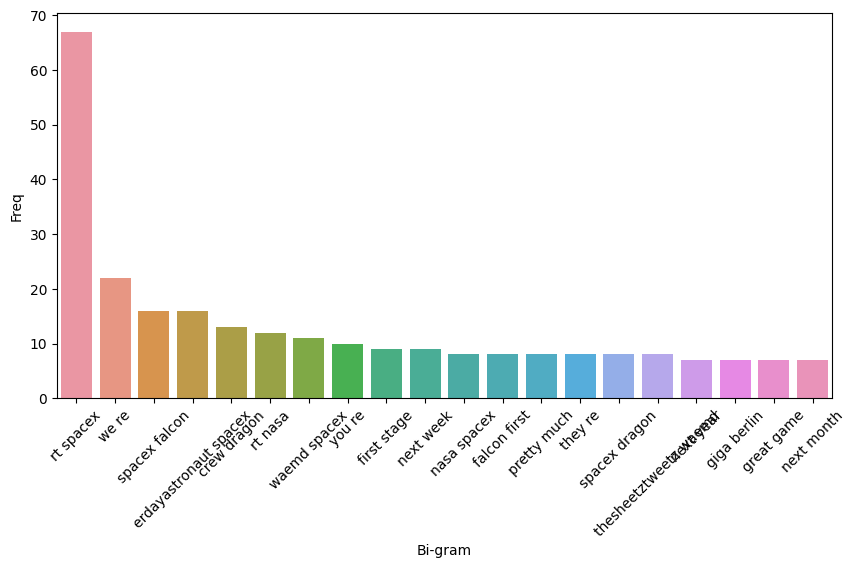

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

# Tri-gram

In [62]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [63]:
top3_words = get_top_n3_words(tweet["Tweet"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head()

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,8
2,thesheetztweetz waemd spacex,8
3,spacex falcon first,7
4,course still love,7


Tri-gram plot

[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'thesheetztweetz waemd spacex'),
 Text(3, 0, 'spacex falcon first'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'rt spacex liftoff'),
 Text(8, 0, 'spacex spacexstarlink wanationalguard'),
 Text(9, 0, 'spacex felixschlang marcushousegame'),
 Text(10, 0, 'first stage landed'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'dragon first operational'),
 Text(14, 0, 'first operational mission'),
 Text(15, 0, 'casparstanley ercxspace marcushousegame'),
 Text(16, 0, 'ercxspace marcushousegame felixschlang'),
 Text(17, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(18, 0, 'joshbickett ajtourville spacex'),
 Text(19, 0, 'spacex falcon launches')]

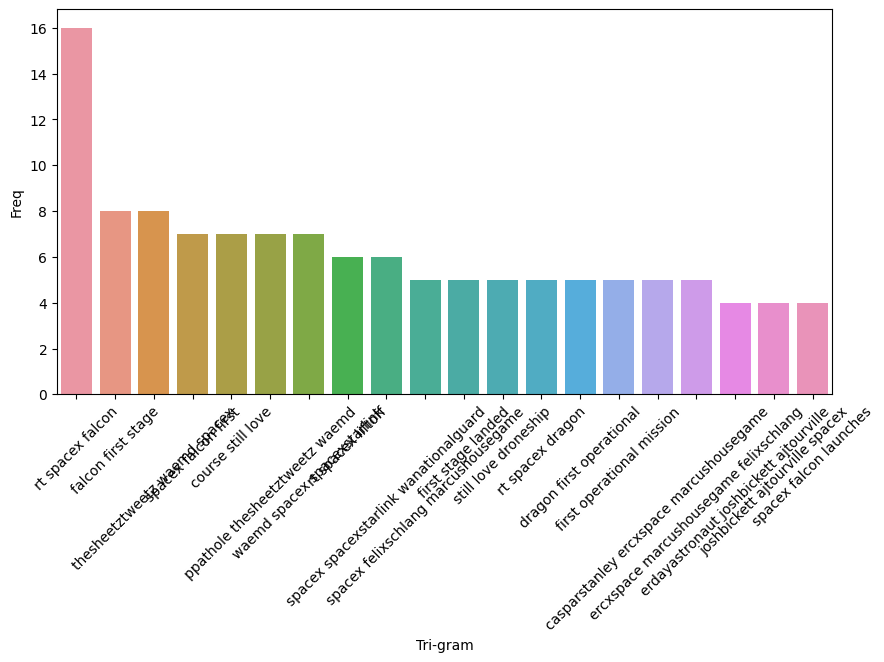

In [64]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# **WordCloud**

In [65]:
string_Total = " ".join(tweet["Tweet"])

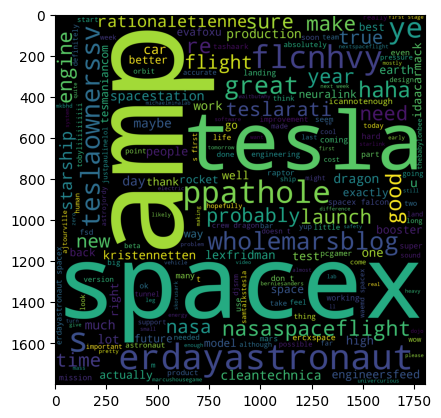

In [67]:
# Wordcloud for entire corpus
from wordcloud import WordCloud

# Generate Word Cloud

# STOPWORDS.add('pron')
# STOPWORDS.add('rt')
# STOPWORDS.add('yeah')
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1800
                ).generate(string_Total)
plt.imshow(wordcloud_stw)


Subjectivity and polarity

In [68]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweet[["subjectivity", "polarity"]] = tweet.apply(sentiment_analysis, axis=1)

tweet

,Tweet,subjectivity,polarity
0,im alien,0.750000,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.00
2,joerogan spotify great interview,0.750000,0.80
3,doge underestimated,0.000000,0.00
4,teslacn congratulations tesla china amazing ex...,0.322222,0.20
...,...,...,...
1693,bbc article provides sensible summary done,0.000000,0.00
1694,rt jimbridenstine news teams nasa spacex remai...,0.000000,0.00
1695,rt nasa theyre coming home aug astronauts astr...,0.000000,0.00
1696,great pyramid tallest structure made humans ye...,0.750000,0.80



Creating a worlcloud

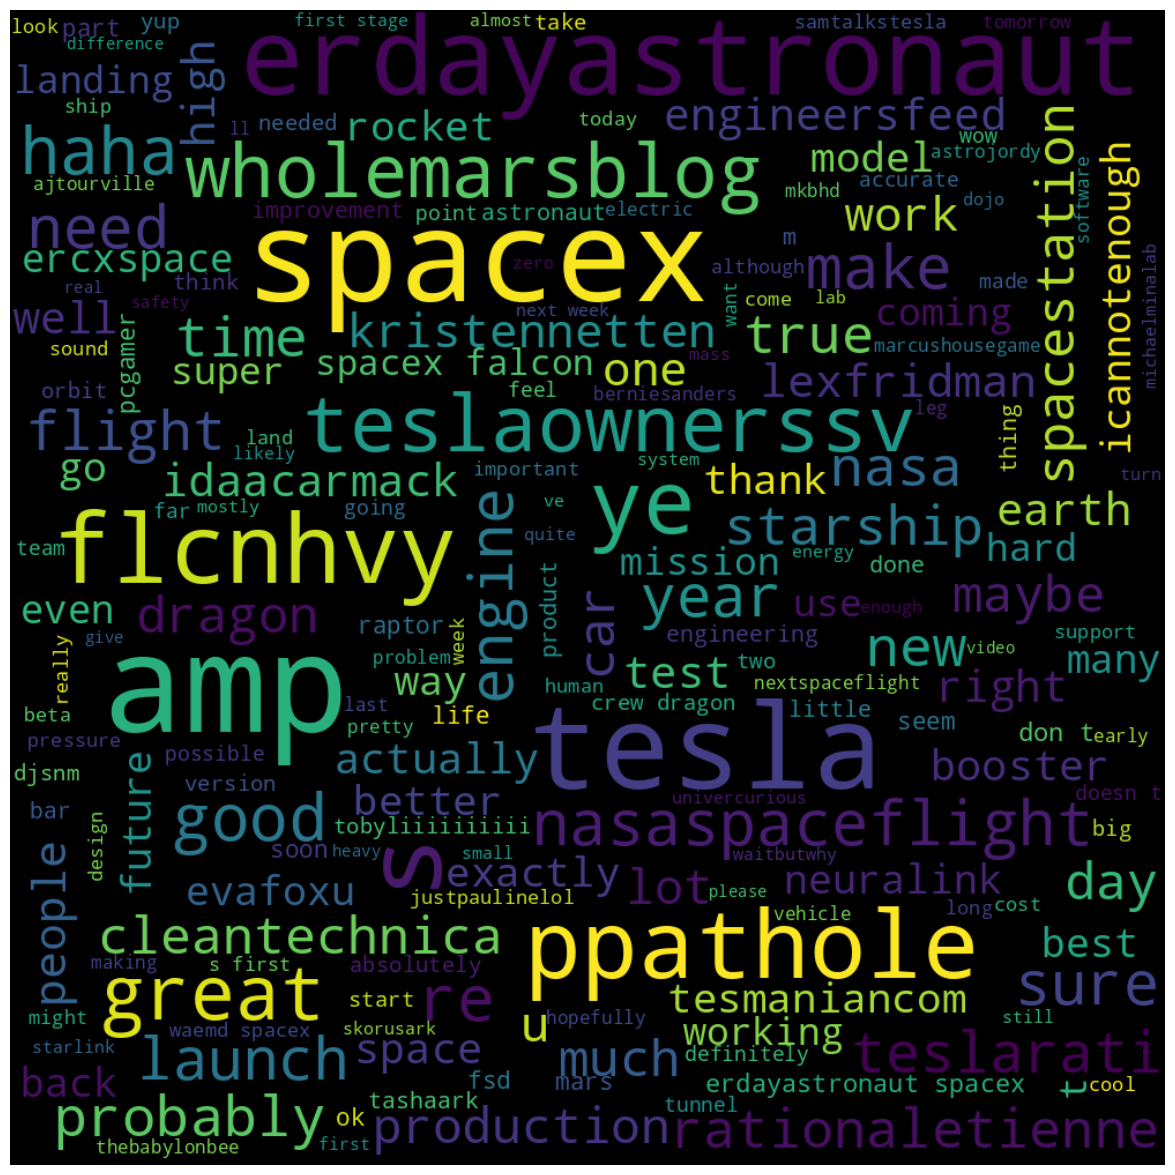

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate Word Cloud

#STOPWORDS.add('pron')
#STOPWORDS.add('rt')
allwords = " ".join([twts for twts in tweet["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [70]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
tweet["analysis"] = tweet["polarity"].apply(analysis)

tweet

,Tweet,subjectivity,polarity,analysis
0,im alien,0.750000,-0.25,Negative
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.00,Neutral
2,joerogan spotify great interview,0.750000,0.80,Positive
3,doge underestimated,0.000000,0.00,Neutral
4,teslacn congratulations tesla china amazing ex...,0.322222,0.20,Positive
...,...,...,...,...
1693,bbc article provides sensible summary done,0.000000,0.00,Neutral
1694,rt jimbridenstine news teams nasa spacex remai...,0.000000,0.00,Neutral
1695,rt nasa theyre coming home aug astronauts astr...,0.000000,0.00,Neutral
1696,great pyramid tallest structure made humans ye...,0.750000,0.80,Positive


In [71]:
# Create a Positive Tweets and Negativeb Tweets
positive_tweets = tweet[tweet['analysis'] == 'Positive']
negative_tweets = tweet[tweet['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Tweet'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


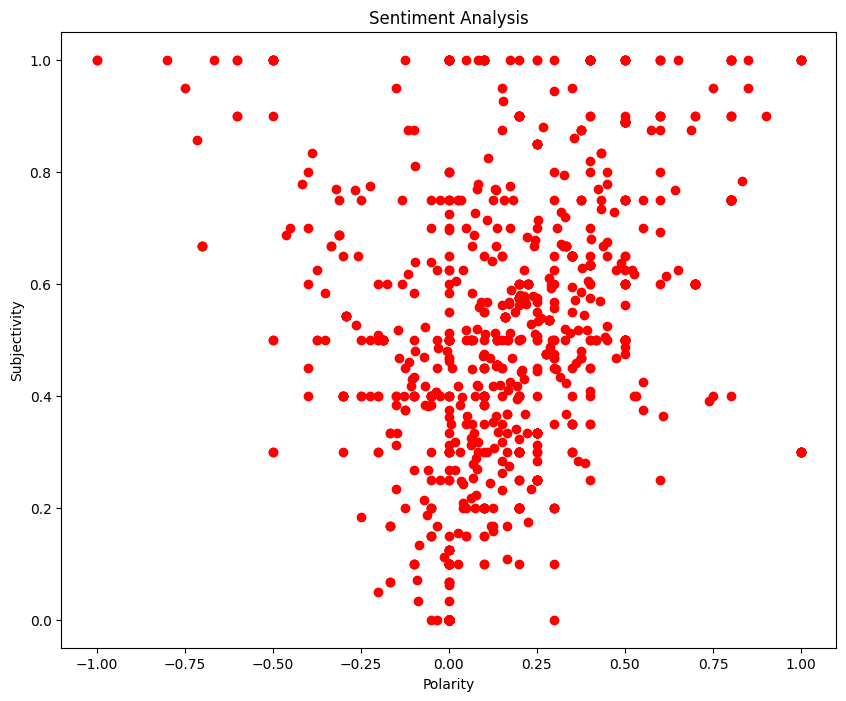

In [72]:
plt.figure(figsize=(10, 8))

for i in range(0, tweet.shape[0]):
    plt.scatter(tweet["polarity"][i], tweet["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [73]:
len(positive_tweets) / len(negative_tweets)

4.102857142857143

**Colclusion:**

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.